In [3]:
import os,glob,csv,scipy
from scipy.io import wavfile
import numpy as np

from IPython import display
import matplotlib.pyplot as plt


In [28]:
folder = 'C://Users/Admin/Documents/Python Scripts/project voice/DATA/Mozilla/cv-corpus-12.0-delta-2022-12-07/fr/clips'
os.chdir(folder)

wav_file_name = 'common_voice_fr_36530166.wav'
sample_rate, wav_data = wavfile.read(wav_file_name, 'rb')
ex = wav_data[18000:24000]

In [29]:
sample_rate

32000

In [30]:
len(wav_data)

135936

In [31]:
display.Audio(ex,rate=sample_rate)

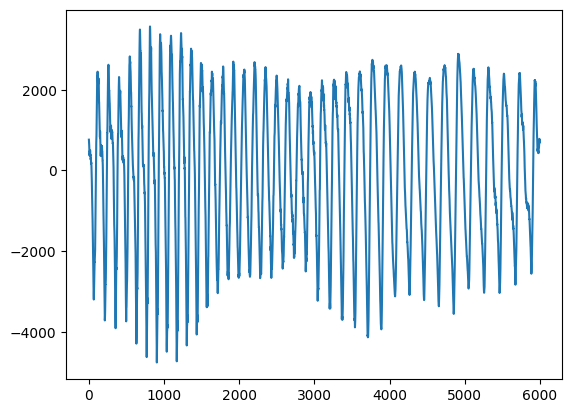

In [32]:
plt.plot(ex)

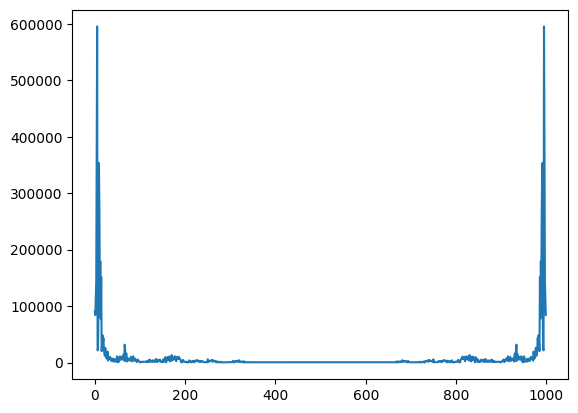

In [27]:
plt.plot(abs(np.fft.fft(ex)))

In [17]:
np.rint(a)

array([0., 0., 0., ..., 1., 0., 0.])

In [51]:
np.fft.fftfreq(wav_data[:,0])

ValueError: n should be an integer

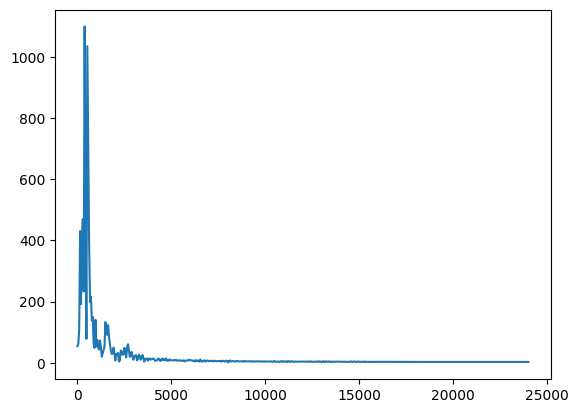

In [18]:
# Number of samplepoints
N = 1000
# sample spacing
T = 1.0 / sample_rate
yf = scipy.fftpack.fft(wav_data[40000:40000+N,0])
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

In [19]:
def fft(signal,rate):
    T = 1.0 / rate
    yf = scipy.fftpack.fft(signal)
    return 2.0/len(signal)*yf[:len(signal)//2]

In [66]:
L_origin = []
W = wav_data[:,0]
N = 1000
for i in progressbar(range(N,len(W),10)):
    L_origin += [fft(W[i-N:i],sample_rate)]
L = np.array(L_origin,dtype = np.complex64)[:,:100]
L = L/(np.abs(L.max()))
L = L.view(np.float32)

100% (1125994 of 1125994) |##############| Elapsed Time: 0:00:15 Time:  0:00:15


In [67]:
len(L_origin[0])

500

In [21]:
np.linspace(0.0, 1.0/(2.0*T), N//2)[:100]

array([   0.        ,   48.09619238,   96.19238477,  144.28857715,
        192.38476954,  240.48096192,  288.57715431,  336.67334669,
        384.76953908,  432.86573146,  480.96192385,  529.05811623,
        577.15430862,  625.250501  ,  673.34669339,  721.44288577,
        769.53907816,  817.63527054,  865.73146293,  913.82765531,
        961.9238477 , 1010.02004008, 1058.11623246, 1106.21242485,
       1154.30861723, 1202.40480962, 1250.501002  , 1298.59719439,
       1346.69338677, 1394.78957916, 1442.88577154, 1490.98196393,
       1539.07815631, 1587.1743487 , 1635.27054108, 1683.36673347,
       1731.46292585, 1779.55911824, 1827.65531062, 1875.75150301,
       1923.84769539, 1971.94388778, 2020.04008016, 2068.13627255,
       2116.23246493, 2164.32865731, 2212.4248497 , 2260.52104208,
       2308.61723447, 2356.71342685, 2404.80961924, 2452.90581162,
       2501.00200401, 2549.09819639, 2597.19438878, 2645.29058116,
       2693.38677355, 2741.48296593, 2789.57915832, 2837.67535

In [22]:
L.shape

(1125994, 200)

In [23]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50,input_shape=(200,)))
model.add(tf.keras.layers.Dense(200))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                10050     
                                                                 
 dense_1 (Dense)             (None, 200)               10200     
                                                                 
Total params: 20,250
Trainable params: 20,250
Non-trainable params: 0
_________________________________________________________________


In [24]:
#data = tf.dataset(L)


L = tf.constant(L)
model.fit(L,L,epochs = 5,batch_size = 100)

Epoch 1/5
11260/11260 [==============================] - 8s 682us/step - loss: 5.7045e-06
Epoch 2/5
11260/11260 [==============================] - 8s 679us/step - loss: 2.5480e-06
Epoch 3/5
11260/11260 [==============================] - 8s 669us/step - loss: 2.5158e-06
Epoch 4/5
11260/11260 [==============================] - 8s 702us/step - loss: 2.5079e-06
Epoch 5/5
11260/11260 [==============================] - 8s 702us/step - loss: 2.5037e-06


100% (900 of 900) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


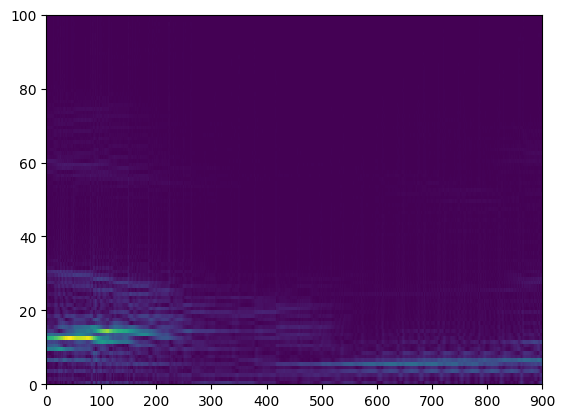

In [46]:
t1 = 1000000
t2 = 1010000
N = 1000

W = wav_data[t1:t2,0]
l = [] 
for i in progressbar(range(N,len(W),10)):
    l += [fft(W[i-N:i],sample_rate)]
l = np.array(l,dtype = np.complex64)[:,:100]
l_v = l/(np.abs(l.max()))
l_v = l_v.view(np.float32)
input_l = tf.constant(l_v)
l_f = np.transpose(np.abs(l.view(np.complex64)))
plt.pcolormesh(l_f)

In [95]:
t1 = 1000000
t2 = 1010000
N = 1000

W = wav_data[t1:t2,0]
test = fft(W,sample_rate)
l = np.array(test,dtype = np.complex64)[:100]
l_v = l/(np.abs(l.max()))
l_v = l_v.view(np.float32)
input_l = tf.expand_dims(tf.constant(l_v),axis=0)

In [116]:
test.shape

(5000,)

In [96]:
input_l.shape

TensorShape([1, 200])

In [97]:
display.Audio(W,rate=sample_rate)

In [98]:
output_l = model(input_l)

In [99]:
output_l.shape

TensorShape([1, 200])

In [117]:
l_o_f = list(np.array(output_l,dtype=np.float32).view(np.complex64)[0])+[0 for i in range(4900)]

In [118]:
len(l_o_f)

5000

In [119]:
np.rint(np.abs(np.fft.ifft(l_o_f))*np.abs(l.max()))

array([0., 0., 0., ..., 0., 0., 0.])

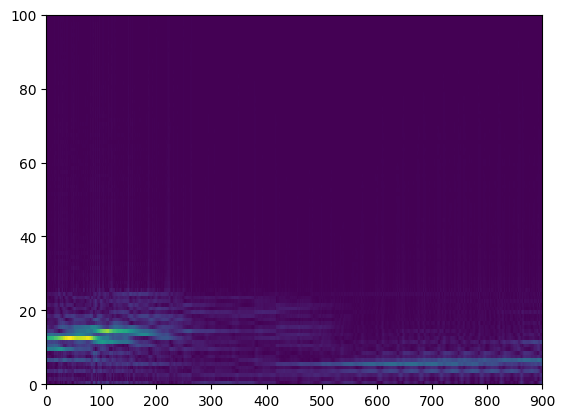

In [51]:
plt.pcolormesh(np.transpose(l_o_f))

In [68]:
fft_complet  = []
for outp in output_l:
    fft_complet += [list(outp) + [0 for i in range(400)]]
o=np.rint(np.abs(np.fft.ifft(fft_complet))*np.abs(l.max()))


In [69]:
o[0]

array([0., 2., 3., 4., 4., 5., 5., 5., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 5., 5., 5., 5., 5., 4., 4., 4., 4., 3., 3., 3., 2., 2., 2., 2.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 2., 2., 2., 2., 2., 3., 3., 3.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3.,
       3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 4., 4., 4., 4.,
       4., 3., 3., 3., 2., 2., 2., 1., 1., 2., 3., 3., 4., 4., 4., 5., 5.,
       6., 6., 6., 6., 6., 7., 7., 7., 7., 7., 6., 6., 6., 6., 6., 6., 6.,
       7., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 5., 5., 5.,
       5., 5., 5., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 5., 5., 5.,
       5., 4., 4., 4., 4., 4., 3., 3., 3., 2., 2., 2., 2., 2., 2., 2., 1.,
       1., 1., 1., 1., 2.

In [83]:
result = list(o[0])
for seq in o[1:]:
    result += list(seq[-10:])

In [86]:
o.shape

(900, 600)

In [84]:
display.Audio(result,rate=sample_rate)

In [85]:
len(result)

9590

In [79]:
len(wav_data[t1:t2,0])

10000